In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
from IPython.display import set_matplotlib_formats
import scipy.integrate as integrate

set_matplotlib_formats('svg')
%matplotlib inline
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [8., 5.]

In [2]:
df = pd.read_csv("data_habr/data_habr_clean.csv")

In [3]:
df.head()

,ind,year,month,day,weekday,hour,author,title,text,lang,comment_count,reading_count,score,is_tutorial,tags,text_len
0,200000,2013,11,13,2,16,clubadm,Клуб анонимных Дедов Морозов 2013 — 2014,буквально вчера британские ученые совершили оч...,ru,552,76703,130,False,"хабраадм, habraadm, анонимный дед мороз, адм, ...",2965
1,200036,2013,10,29,1,17,JuliaP,Будущее освещения — «лампочка» из органики,физик дмитрий паращук рассказывает об актуальн...,ru,7,5460,5,False,"ПостНаука, нанотехнологии, светоизлучающая орг...",2143
2,200044,2013,10,29,1,18,Gendalph,Еще один изогнутый телефон — LG G Flex,2 дня назад на engadget появилась новость об а...,ru,26,15974,0,False,"lg, g flex, изогнутый экран, self-healing glas...",6295
3,200046,2013,10,30,2,15,Kitsok,Как мы строили авиатренажер A320: история в ка...,привет всем в прошлом посте я написал о бесцен...,ru,23,32347,88,False,"авиасимулятор, своими руками, работа над ошибками",17552
4,200048,2013,10,29,1,19,guskov,Продуктивная прокрастинация: разработка под Bl...,я не фанат android и еще больший не фанат java...,ru,65,17769,45,False,"blackberry, tizen, разработка, blackberry worl...",13100


In [4]:
df.describe()

,ind,year,month,day,weekday,hour,comment_count,reading_count,score,text_len
count,107010.000000,107010.000000,107010.000000,107010.000000,107010.000000,107010.000000,107010.000000,1.070100e+05,107010.000000,107010.000000
mean,358401.826474,2016.731932,6.465629,16.144884,2.397673,13.469227,34.199458,2.111053e+04,21.792963,9729.801439
std,85873.718473,1.971918,3.535026,8.726353,1.784176,4.955767,73.967827,3.859158e+04,28.143718,8875.498600
min,200000.000000,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.800000e+01,-182.000000,2000.000000
25%,284582.500000,2015.000000,3.000000,9.000000,1.000000,11.000000,4.000000,5.737250e+03,8.000000,4457.000000
50%,358735.000000,2017.000000,6.000000,16.000000,2.000000,13.000000,12.000000,1.156050e+04,14.000000,7331.000000
75%,433377.500000,2018.000000,10.000000,24.000000,4.000000,17.000000,34.000000,2.337975e+04,26.000000,12049.750000
max,499994.000000,2020.000000,12.000000,31.000000,6.000000,23.000000,2461.000000,5.514990e+06,791.000000,328003.000000


In [5]:
def plot_hist(df, column, title):
    b = len(set(df[column])) if column in {"hour", "year", "month"} else None
    ax = sns.distplot(df[column], bins=b)
    ax.set(xlabel=column, ylabel="count")
    plt.title(title)
    plt.show()

Распределение постов по времени их появления на сайте (по часам).

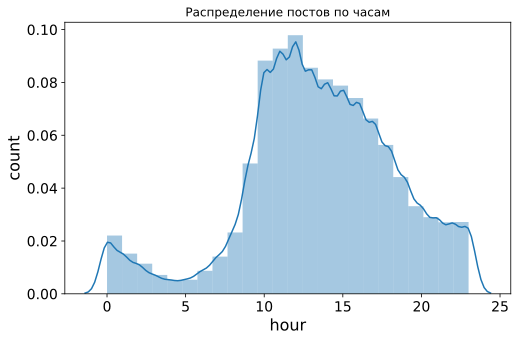

In [6]:
plot_hist(df, "hour", "Распределение постов по часам")

Распределение постов по месяцам.

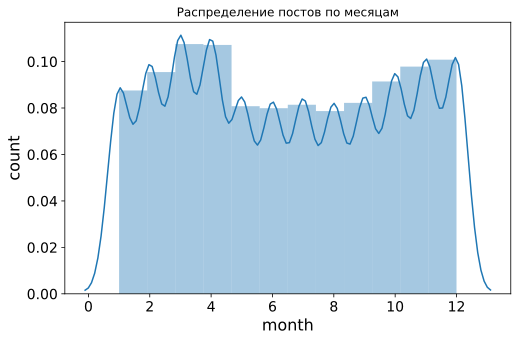

In [7]:
plot_hist(df, "month", "Распределение постов по месяцам")

Распределение постов по годам.

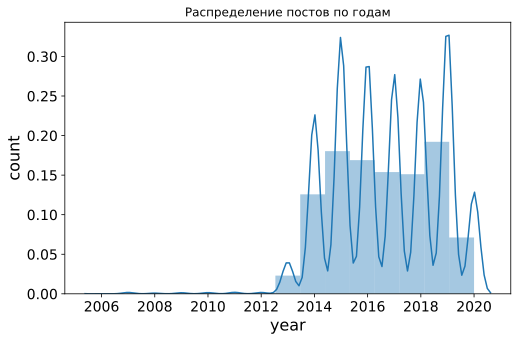

In [8]:
plot_hist(df, "year", "Распределение постов по годам")

Распределение количества лайков.

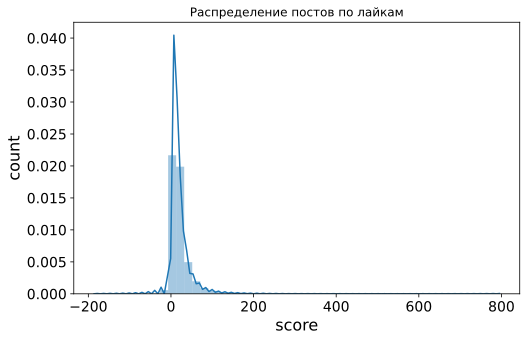

In [9]:
plot_hist(df, "score", "Распределение постов по лайкам")

In [10]:
df["score"].describe()

count    107010.000000
mean         21.792963
std          28.143718
min        -182.000000
25%           8.000000
50%          14.000000
75%          26.000000
max         791.000000
Name: score, dtype: float64

Распределение постов по количеству комментариев.

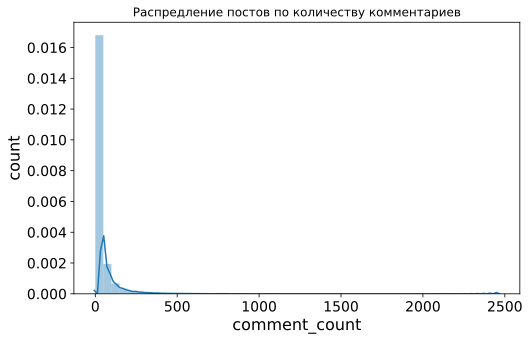

In [11]:
plot_hist(df, "comment_count", "Распредление постов по количеству комментариев")

Распредление постов по количеству просмотров. В данном случае было применено логарифмирование по основанию 10, т.к. гистограмма исходного ряда малоинформативна ввиду большого разброса величин. После преобразования видно, что наиболее часто посты обладают количеством просмотров порядка нескольких десятков тысяч. 

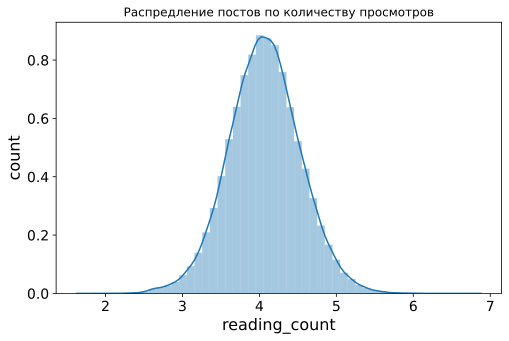

In [12]:
ax = sns.distplot(np.log10(df["reading_count"]))
ax.set(xlabel="reading_count", ylabel="count")
plt.title("Распредление постов по количеству просмотров")
plt.show()

In [13]:
df["reading_count"].describe()

count    1.070100e+05
mean     2.111053e+04
std      3.859158e+04
min      5.800000e+01
25%      5.737250e+03
50%      1.156050e+04
75%      2.337975e+04
max      5.514990e+06
Name: reading_count, dtype: float64

Распределение постов по длине постов (по кол-ву символов).

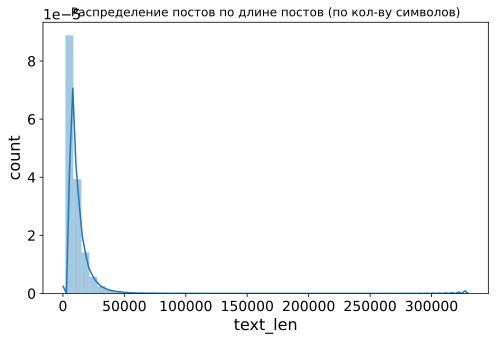

In [14]:
plot_hist(df, "text_len", "Распределение постов по длине постов (по кол-ву символов)")

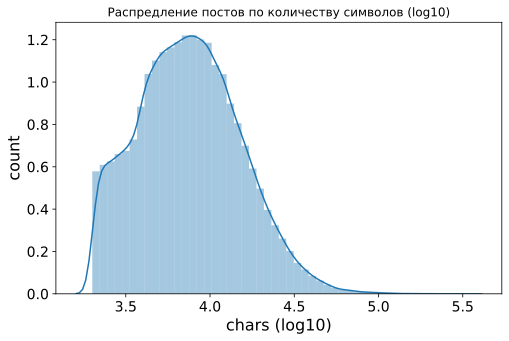

In [15]:
ax = sns.distplot(np.log10(df["text_len"]))
ax.set(xlabel="chars (log10)", ylabel="count")
plt.title("Распредление постов по количеству символов (log10)")
plt.show()

Из гисторграммы видно, что в основном длина поста в символах равна 5-10 тысяч.

Распределение постов по количеству слов.

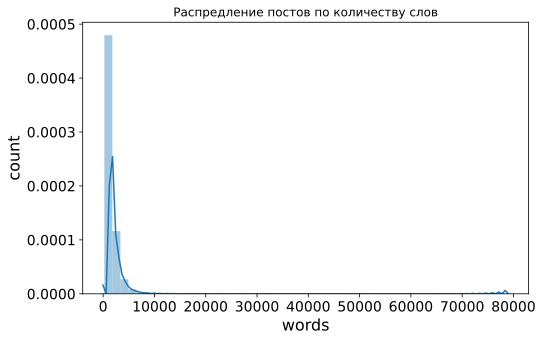

In [16]:
ax = sns.distplot(list(map(lambda x: len(x.split()), df["text"])))
ax.set(xlabel="words", ylabel="count")
plt.title("Распредление постов по количеству слов")
plt.show()

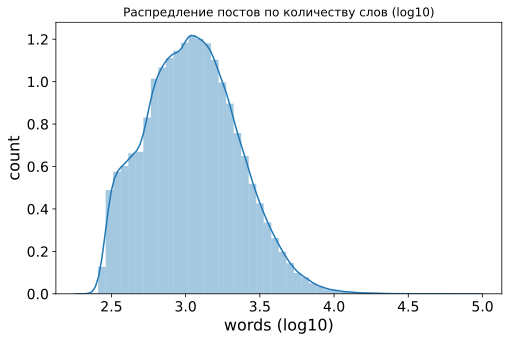

In [17]:
ax = sns.distplot(np.log10(list(map(lambda x: len(x.split()), df["text"]))))
ax.set(xlabel="words (log10)", ylabel="count")
plt.title("Распредление постов по количеству слов (log10)")
plt.show()

Из графика видно, что большую часть постов составляют посты, длина которых от 1000 до 2000 тысяч слов.

10 самых популярных авторов.

In [18]:
authors = df.groupby("author").count().sort_values(by="year", ascending=False).head(10)

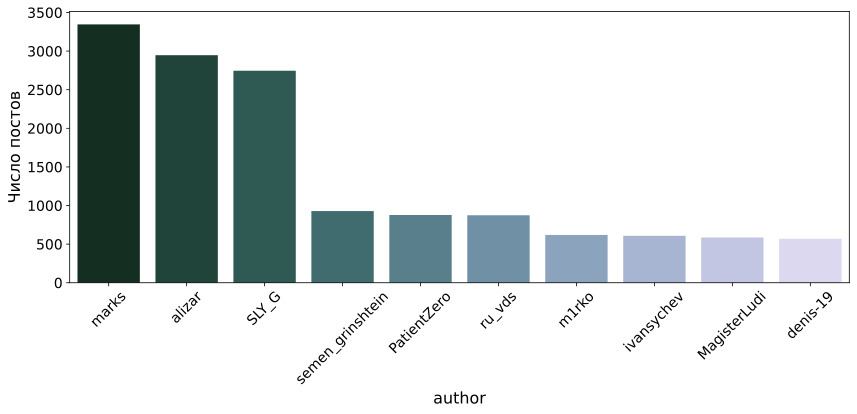

In [19]:
plt.figure(figsize=(14,5)) 
ax = sns.barplot(authors.index, authors.year, palette=sns.cubehelix_palette(10, reverse=True, start=200))
ax.set(ylabel='Число постов')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

9. Выичслим корреляции между различными параметрами статей.

In [20]:
coef, p_val = ss.pearsonr(df["reading_count"], df["comment_count"])
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: 0.3601186026888414
pvalue: 0.0


In [21]:
coef, p_val = ss.pearsonr(df["comment_count"], df["score"])
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: 0.4810482469695902
pvalue: 0.0


In [22]:
coef, p_val = ss.pearsonr(df["reading_count"], df["score"])
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: 0.4235958306843412
pvalue: 0.0


In [23]:
coef, p_val = ss.pearsonr(df["reading_count"], list(map(lambda x: len(x.split()), df["text"])))
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: 0.10082035478233711
pvalue: 9.586935051648715e-240


In [24]:
coef, p_val = ss.pearsonr(df["comment_count"], list(map(lambda x: len(x.split()), df["text"])))
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: 0.027649915210737785
pvalue: 1.4752971145277022e-19


In [25]:
coef, p_val = ss.pearsonr(df["score"], list(map(lambda x: len(x.split()), df["text"])))
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: 0.14126062173986473
pvalue: 0.0


Также можно посчитать корреляцию между кол-вом постов у автора и счетом, который ему ставят.

In [26]:
top_authors = list(authors.index)
mean_scores = []
for item in top_authors:
    mean_scores.append(df[df["author"] == item]["score"].mean())

In [27]:
coef, p_val = ss.pearsonr(authors.year, mean_scores)
print("Корреляция:", coef)
print("pvalue:", p_val)

Корреляция: -0.2218819061020151
pvalue: 0.5378311282747553


По данным наблюдениям можно выделить следующие особенности:

1. Во всех случаях, кроме последнего, p_value около нуля, что означает, что кожффициенты корреляции значимы. В последнем случае, скорее всего ввиду малого числа точек, коэффициент корреляции получился не значимый.
2. Довольно сильно коррелированы величины кол-ва просмотров, кол-ва комментариев и счета поста, что достаточно ожидаемо (чем больше у поста просмотров, тем вероятнее ему будут писать комментарии).

Выделим самые популярные теги для статей. При этом в качестве признаков для даннхы можно взять 100 самых популярных тегов и взять их one-hot представление.

In [28]:
from collections import Counter
from pprint import pprint


def get_tags(df):
    ls = []
    for item in df["tags"]:
        ls.extend(list(map(lambda x: x.lower(), item.split(", "))))
    return ls 


tags = get_tags(df)
tags_dict = Counter(tags)
print("100 самых популярных тегов")
pprint(tags_dict.most_common(100))
tags_set = {item for item, _ in tags_dict.most_common(100)}
print("Количество уникальных тегов", len(tags_dict.keys()))

100 самых популярных тегов
[('javascript', 3112),
 ('android', 2458),
 ('python', 2218),
 ('java', 2121),
 ('разработка', 2026),
 ('программирование', 1703),
 ('linux', 1660),
 ('php', 1578),
 ('информационная безопасность', 1490),
 ('microsoft', 1454),
 ('ios', 1432),
 ('c++', 1424),
 ('google', 1314),
 ('c#', 1245),
 ('машинное обучение', 1168),
 ('.net', 1072),
 ('open source', 1060),
 ('css', 988),
 ('игры', 929),
 ('искусственный интеллект', 917),
 ('безопасность', 900),
 ('apple', 890),
 ('тестирование', 879),
 ('перевод', 838),
 ('arduino', 799),
 ('react', 787),
 ('дайджест', 776),
 ('api', 759),
 ('конференция', 743),
 ('windows', 735),
 ('космос', 724),
 ('обучение', 716),
 ('стартапы', 707),
 ('devops', 707),
 ('маркетинг', 706),
 ('iot', 706),
 ('machine learning', 691),
 ('управление проектами', 689),
 ('дизайн', 662),
 ('умный дом', 649),
 ('html', 643),
 ('алгоритмы', 641),
 ('docker', 641),
 ('postgresql', 627),
 ('гаджеты', 617),
 ('node.js', 615),
 ('яндекс', 604),
 (

Получим теперь one-hot представление тегов средствами pandas.

In [29]:
def return_pop_tags(st):
    return [t for t in st.lower().split(", ") if t in tags_set]

df["tags"] = [return_pop_tags(item) for item in df["tags"]]

In [30]:
tmp = df.explode("tags")
one_hot_tags = pd.get_dummies(tmp["tags"]).groupby(tmp.index).sum()
del tmp
one_hot_tags.head()

,.net,3d-печать,agile,android,android development,angular,api,apple,arduino,azure,...,социальные сети,ссылки,стартап,стартапы,сша,тестирование,умный дом,управление проектами,финансы,яндекс
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
taged_df = df.join(one_hot_tags, df.index == one_hot_tags.index)
taged_df.to_csv("/content/drive/My Drive/data_habr/data_habr_taged.csv", index=False)

In [32]:
taged_df.head()

,ind,year,month,day,weekday,hour,author,title,text,lang,...,социальные сети,ссылки,стартап,стартапы,сша,тестирование,умный дом,управление проектами,финансы,яндекс
0,200000,2013,11,13,2,16,clubadm,Клуб анонимных Дедов Морозов 2013 — 2014,буквально вчера британские ученые совершили оч...,ru,...,0,0,0,0,0,0,0,0,0,0
1,200036,2013,10,29,1,17,JuliaP,Будущее освещения — «лампочка» из органики,физик дмитрий паращук рассказывает об актуальн...,ru,...,0,0,0,0,0,0,0,0,0,0
2,200044,2013,10,29,1,18,Gendalph,Еще один изогнутый телефон — LG G Flex,2 дня назад на engadget появилась новость об а...,ru,...,0,0,0,0,0,0,0,0,0,0
3,200046,2013,10,30,2,15,Kitsok,Как мы строили авиатренажер A320: история в ка...,привет всем в прошлом посте я написал о бесцен...,ru,...,0,0,0,0,0,0,0,0,0,0
4,200048,2013,10,29,1,19,guskov,Продуктивная прокрастинация: разработка под Bl...,я не фанат android и еще больший не фанат java...,ru,...,0,0,0,0,0,0,0,0,0,0
